In [7]:
import pandas as pd
import matplotlib.pyplot as plt

lettergrade_df = pd.read_excel('letter_grade_file.xlsx')
lettergrade_df.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_asvab_rate,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,18.4,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3
1,2023,10,Anderson County,3,Anderson County Career Technical Center,1,K8,N,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
2,2023,10,Anderson County,4,Anderson County Innovation Academy,1,K8,N,Y,Y,...,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School


In [3]:
#Data Cleaning
lettergrade_df.columns

Index(['year', 'system', 'system_name', 'school', 'school_name',
       'lg_ineligible', 'school_pool', 'grade_band_3-5', 'grade_band_6-8',
       'grade_band_9-12', 'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'ach_score_weighted', 'growth_score_weighted',
       'growth25_score_weighted', 'ccr_score_weighted', 'ach_weight',
       'growth_weight', 'growth25_weight', 'ccr_weight', 'lg_score',
       'lg_grade', 'overall_success_rate_all_students',
       'overall_success_rate_ed', 'overall_success_rate_el',
       'overall_success_rate_swd', 'overall_success_rate_aian',
       'overall_success_rate_asian', 'overall_success_rate_black',
       'overall_success_rate_hispanic', 'overall_success_rate_nhpi',
       'overall_success_rate_white', 'success_rate_g3-5_ela',
       'success_rate_g3-5_math', 'success_rate_g3-5_science',
       'success_rate_g6-8_ela', 'success_rate_g6-8_math',
       'success_rate_g6-8_science', 'success_rate_g6-8_social_studies',
       'su

In [8]:
print(lettergrade_df.shape)

(1900, 74)


In [13]:
#Data Cleaning - Count Not Eligibles
not_eligible_count = lettergrade_df[lettergrade_df['lg_grade'] == 'Not Eligible for a Letter Grade'].shape[0]
print(not_eligible_count)

210


In [14]:
#Data Cleaning - Remove Not Eligibles
filtered_df = lettergrade_df[lettergrade_df['lg_grade'] != 'Not Eligible for a Letter Grade']
filtered_df.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_asvab_rate,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,18.4,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
5,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School
6,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School


In [15]:
filtered_df.shape

(1690, 74)

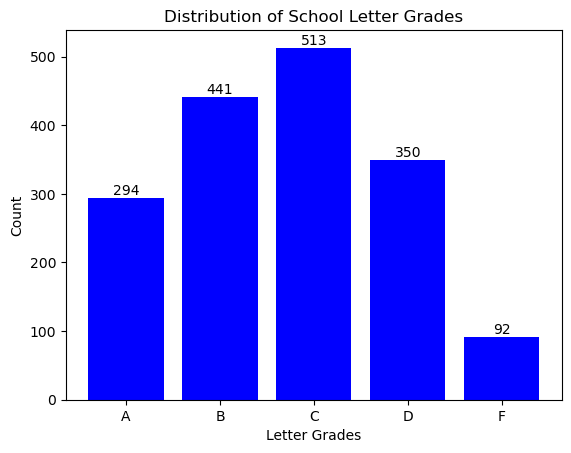

In [16]:
import matplotlib.pyplot as plt

# Assuming grade_counts contains the counts for each grade
grade_counts = filtered_df['lg_grade'].value_counts()

# Sorting the index if you want the grades in a specific order
grade_counts = grade_counts.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(grade_counts.index, grade_counts.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Count')
plt.title('Distribution of School Letter Grades')
plt.show()


In [17]:
# Counting each grade
grade_counts = filtered_df['lg_grade'].value_counts()

# Calculating percentages
total_grades = grade_counts.sum()
grade_percentages = (grade_counts / total_grades) * 100

# Combining counts and percentages
grade_summary = pd.DataFrame({
    'Count': grade_counts,
    'Percentage': grade_percentages
})

# Sorting the index if needed
grade_summary = grade_summary.reindex(['A', 'B', 'C', 'D', 'F'])

print(grade_summary)


   Count  Percentage
A    294   17.396450
B    441   26.094675
C    513   30.355030
D    350   20.710059
F     92    5.443787


In [18]:
filtered_df['ach_score'].unique()

array(['4', '5', '3', '2', '1', '3.3', '2.5', '2.3', '1.9', '2.4', '3.4',
       '4.1', '2.7', '2.9', '3.6', '3.7', '4.7', '3.9', '4.5', '4.4',
       '4.8', '3.5', '2.6', '4.2', '1.7', '3.8', '2.1', '1.1', '1.8',
       '1.4', '3.2', '1.6', '1.5', '1.3', '2.2', '4.3', '2.8', '1.2'],
      dtype=object)

In [19]:
# Convert 'ach_score', 'growth_score', and 'growth25_score' to floats
filtered_df['ach_score'] = pd.to_numeric(filtered_df['ach_score'], errors='coerce')
filtered_df['growth_score'] = pd.to_numeric(filtered_df['growth_score'], errors='coerce')
filtered_df['growth25_score'] = pd.to_numeric(filtered_df['growth25_score'], errors='coerce')

# Recalculating the means
average_ach_score = filtered_df.groupby('lg_grade')['ach_score'].mean()
average_growth_score = filtered_df.groupby('lg_grade')['growth_score'].mean()
average_growth25_score = filtered_df.groupby('lg_grade')['growth25_score'].mean()

# Display the results
print("Average Achievement Scores by Letter Grade:\n", average_ach_score)
print("\nAverage Growth Scores by Letter Grade:\n", average_growth_score)
print("\nAverage Growth25 Scores by Letter Grade:\n", average_growth25_score)

Average Achievement Scores by Letter Grade:
 lg_grade
A    4.849320
B    3.948299
C    2.957310
D    2.001429
F    1.020652
Name: ach_score, dtype: float64

Average Growth Scores by Letter Grade:
 lg_grade
A    4.955782
B    3.918367
C    2.801170
D    1.617143
F    1.000000
Name: growth_score, dtype: float64

Average Growth25 Scores by Letter Grade:
 lg_grade
A    4.454861
B    3.575058
C    3.101594
D    2.644377
F    3.209302
Name: growth25_score, dtype: float64


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/460640955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ach_score'] = pd.to_numeric(filtered_df['ach_score'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/460640955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['growth_score'] = pd.to_numeric(filtered_df['growth_score'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/460640955.py:4: Set

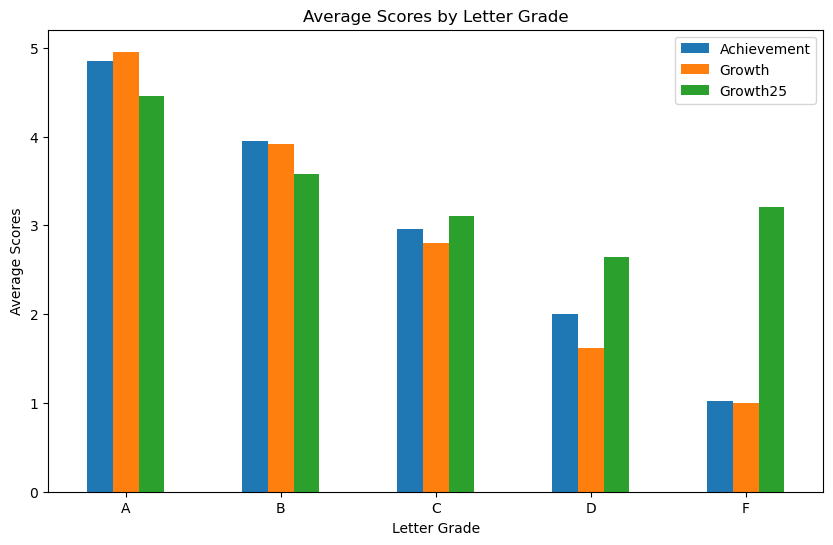

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming average_ach_score, average_growth_score, and average_growth25_score are your DataFrames

# Combining the average scores into a single DataFrame
combined_scores = pd.DataFrame({
    'Achievement': average_ach_score,
    'Growth': average_growth_score,
    'Growth25': average_growth25_score
})

# Resetting index to get 'lg_grade' as a column
combined_scores.reset_index(inplace=True)

# Plotting
ax = combined_scores.plot(x='lg_grade', kind='bar', figsize=(10, 6), rot=0)

# Adding labels and title
ax.set_xlabel('Letter Grade')
ax.set_ylabel('Average Scores')
ax.set_title('Average Scores by Letter Grade')

# Showing the plot
plt.show()


In [21]:
# Assuming 'lettergrade_df' is your original DataFrame and has all the required columns
df_filtered_raw = lettergrade_df[['overall_success_rate_all_students', 'growth_numeracy_score', 
                                  'growth_literacy_score', 'lg_score', 'lg_grade']].copy()

# Display the first few rows of the new DataFrame to verify it looks correct
print(df_filtered_raw.head())


  overall_success_rate_all_students growth_numeracy_score  \
0                              34.2                     5   
1              Insufficient N Count  Insufficient N Count   
2              Insufficient N Count  Insufficient N Count   
3                              52.2                     5   
4                              30.5                     2   

  growth_literacy_score                         lg_score  \
0                     1                              3.7   
1  Insufficient N Count  Not Eligible for a Letter Grade   
2  Insufficient N Count  Not Eligible for a Letter Grade   
3                     3                              4.4   
4                     3                              2.5   

                          lg_grade  
0                                B  
1  Not Eligible for a Letter Grade  
2  Not Eligible for a Letter Grade  
3                                B  
4                                C  


In [22]:
import pandas as pd
import numpy as np

# Assuming 'df_filtered_raw' is your original DataFrame

# Replace 'Insufficient N Count' with NaN
df_filtered_raw.replace('Insufficient N Count', np.nan, inplace=True)

# Drop rows with any NaN values
df_filtered_cleaned_raw = df_filtered_raw.dropna()

# Display the first few rows of the cleaned DataFrame to verify
print(df_filtered_cleaned_raw.head())


  overall_success_rate_all_students growth_numeracy_score  \
0                              34.2                     5   
3                              52.2                     5   
4                              30.5                     2   
5                              33.6                     3   
6                              30.1                     1   

  growth_literacy_score lg_score lg_grade  
0                     1      3.7        B  
3                     3      4.4        B  
4                     3      2.5        C  
5                     4      3.8        B  
6                     2      2.2        D  


In [23]:
# First, ensure the 'growth_numeracy_score', 'growth_literacy_score', and 'lg_score' are numeric
df_filtered_cleaned_raw['overall_success_rate_all_students'] = pd.to_numeric(df_filtered_cleaned_raw['overall_success_rate_all_students'], errors='coerce')
df_filtered_cleaned_raw['growth_numeracy_score'] = pd.to_numeric(df_filtered_cleaned_raw['growth_numeracy_score'], errors='coerce')
df_filtered_cleaned_raw['growth_literacy_score'] = pd.to_numeric(df_filtered_cleaned_raw['growth_literacy_score'], errors='coerce')
df_filtered_cleaned_raw['lg_score'] = pd.to_numeric(df_filtered_cleaned_raw['lg_score'], errors='coerce')

# Drop any rows that now contain NaNs after the conversion
df_filtered_cleaned_raw = df_filtered_cleaned_raw.dropna(subset=['overall_success_rate_all_students', 'growth_numeracy_score', 'growth_literacy_score', 'lg_score'])

# Now calculate the mean, ensuring that we ignore any remaining non-numeric data
average_scores_by_grade_raw = df_filtered_cleaned_raw.groupby('lg_grade').mean()

print(average_scores_by_grade_raw)



          overall_success_rate_all_students  growth_numeracy_score  \
lg_grade                                                             
A                                 57.341034               4.448276   
B                                 43.865760               3.721088   
C                                 32.723392               2.941520   
D                                 22.764535               1.875000   
F                                 11.665854               1.548780   

          growth_literacy_score  lg_score  
lg_grade                                   
A                      4.106897  4.845172  
B                      3.358277  3.903855  
C                      2.922027  2.920663  
D                      2.313953  1.945640  
F                      1.914634  1.228049  


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/3193237158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_cleaned_raw['overall_success_rate_all_students'] = pd.to_numeric(df_filtered_cleaned_raw['overall_success_rate_all_students'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/3193237158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_cleaned_raw['growth_numeracy_score'] = pd.to_numeric(df_filtered_cleaned_raw['growth_num

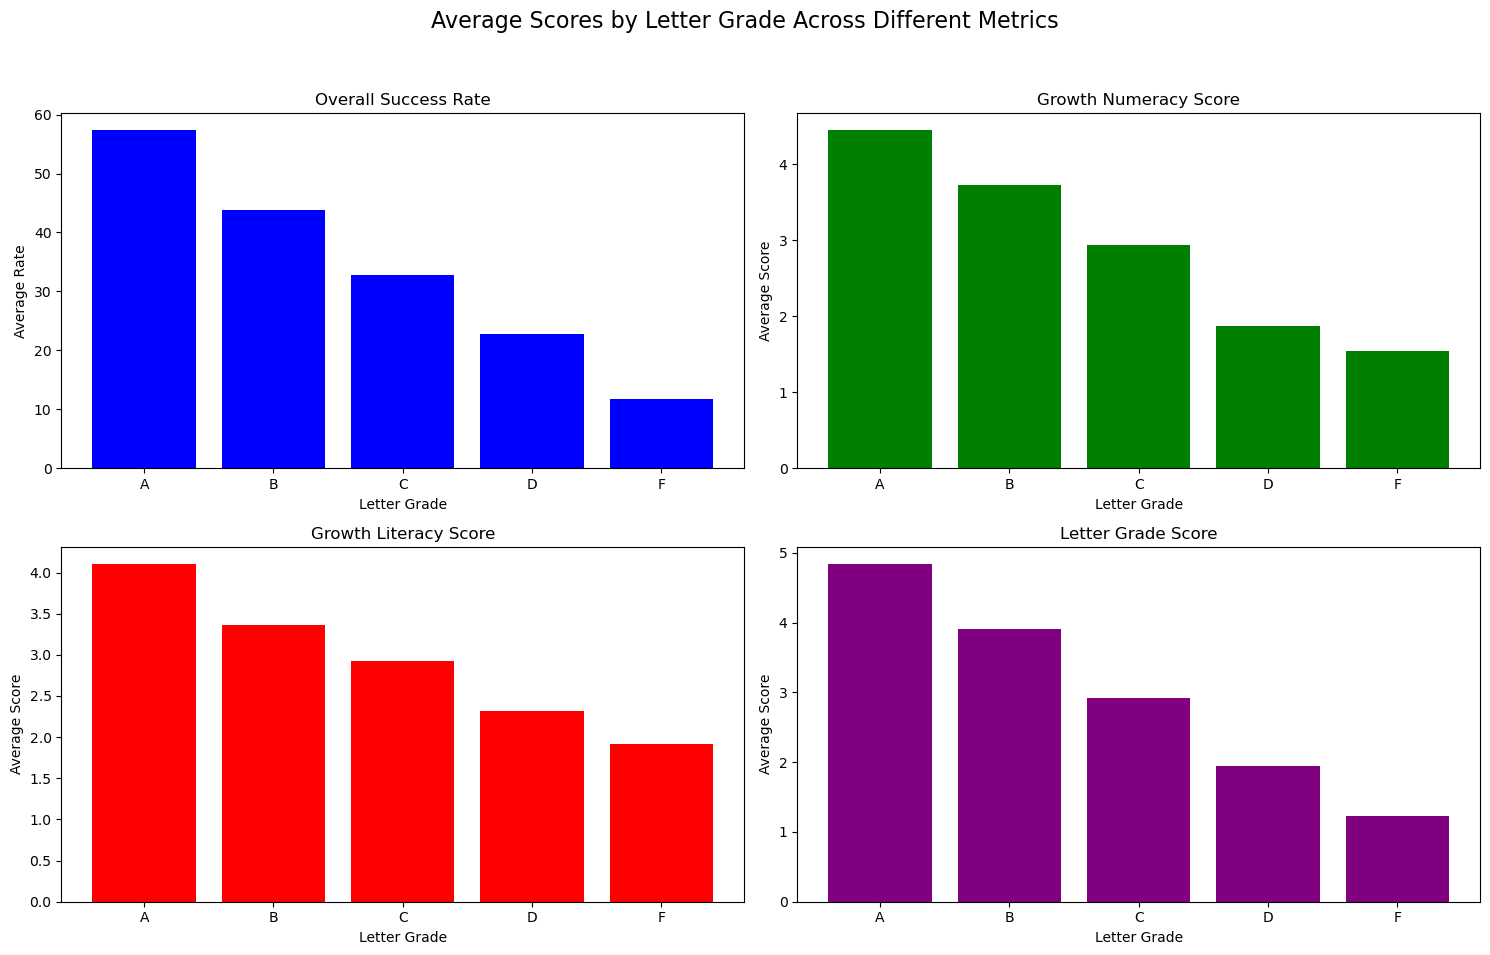

In [24]:
import matplotlib.pyplot as plt

# Assuming df_filtered_cleaned_raw is your DataFrame and it's properly formatted

# Group by 'lg_grade' and calculate the mean
grouped_data = df_filtered_cleaned_raw.groupby('lg_grade').mean()

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust the size as needed
fig.suptitle('Average Scores by Letter Grade Across Different Metrics', fontsize=16)

# Overall Success Rate Bar Chart
axes[0, 0].bar(grouped_data.index, grouped_data['overall_success_rate_all_students'], color='blue')
axes[0, 0].set_title('Overall Success Rate')
axes[0, 0].set_xlabel('Letter Grade')
axes[0, 0].set_ylabel('Average Rate')

# Growth Numeracy Score Bar Chart
axes[0, 1].bar(grouped_data.index, grouped_data['growth_numeracy_score'], color='green')
axes[0, 1].set_title('Growth Numeracy Score')
axes[0, 1].set_xlabel('Letter Grade')
axes[0, 1].set_ylabel('Average Score')

# Growth Literacy Score Bar Chart
axes[1, 0].bar(grouped_data.index, grouped_data['growth_literacy_score'], color='red')
axes[1, 0].set_title('Growth Literacy Score')
axes[1, 0].set_xlabel('Letter Grade')
axes[1, 0].set_ylabel('Average Score')

# LG Score Bar Chart
axes[1, 1].bar(grouped_data.index, grouped_data['lg_score'], color='purple')
axes[1, 1].set_title('Letter Grade Score')
axes[1, 1].set_xlabel('Letter Grade')
axes[1, 1].set_ylabel('Average Score')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


In [25]:
school_profiles_df = pd.read_excel('school_profiles.xlsx')
school_profiles_df.head()

,school_year,district_id,district_name,school_id,school_name,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,...,hispanic_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,2021-22,10,Anderson County,2,Anderson County High School,1080,Less than 5%,Less than 5%,Less than 5%,23,...,Less than 5%,Less than 5%,Less than 5%,51,Less than 5%,Less than 5%,Less than 5%,Less than 5%,14,94
1,2021-22,10,Anderson County,4,Anderson County Innovation Academy,28,Less than 5%,Less than 5%,7,36,...,Less than 5%,Less than 5%,Less than 5%,50,Less than 5%,Less than 5%,7,Less than 5%,11,93
2,2021-22,10,Anderson County,5,Andersonville Elementary,288,Less than 5%,Less than 5%,Less than 5%,26,...,Less than 5%,Less than 5%,Less than 5%,49,Less than 5%,Less than 5%,Less than 5%,Less than 5%,15,94
3,2021-22,10,Anderson County,10,Briceville Elementary,100,Less than 5%,Less than 5%,Less than 5%,45,...,Less than 5%,Less than 5%,Less than 5%,57,Less than 5%,Less than 5%,Less than 5%,Less than 5%,26,More than 95%
4,2021-22,10,Anderson County,15,Claxton Elementary,428,8,Less than 5%,17,39,...,8,Less than 5%,5,53,Less than 5%,Less than 5%,11,Less than 5%,20,83


In [26]:
filtered_df['primary_key'] = filtered_df['system'].astype(str) + '-' + filtered_df['school'].astype(str)
school_profiles_df['primary_key'] = school_profiles_df['district_id'].astype(str) + '-' + school_profiles_df['school_id'].astype(str)

/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/3449049240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['primary_key'] = filtered_df['system'].astype(str) + '-' + filtered_df['school'].astype(str)


In [27]:
filtered_df.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white,primary_key
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3,10-2
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-5
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-10
5,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-15
6,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-20


In [28]:
school_profiles_df

,school_year,district_id,district_name,school_id,school_name,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,...,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,2021-22,10,Anderson County,2,Anderson County High School,1080,Less than 5%,Less than 5%,Less than 5%,23,...,Less than 5%,Less than 5%,51,Less than 5%,Less than 5%,Less than 5%,Less than 5%,14,94,10-2
1,2021-22,10,Anderson County,4,Anderson County Innovation Academy,28,Less than 5%,Less than 5%,7,36,...,Less than 5%,Less than 5%,50,Less than 5%,Less than 5%,7,Less than 5%,11,93,10-4
2,2021-22,10,Anderson County,5,Andersonville Elementary,288,Less than 5%,Less than 5%,Less than 5%,26,...,Less than 5%,Less than 5%,49,Less than 5%,Less than 5%,Less than 5%,Less than 5%,15,94,10-5
3,2021-22,10,Anderson County,10,Briceville Elementary,100,Less than 5%,Less than 5%,Less than 5%,45,...,Less than 5%,Less than 5%,57,Less than 5%,Less than 5%,Less than 5%,Less than 5%,26,More than 95%,10-10
4,2021-22,10,Anderson County,15,Claxton Elementary,428,8,Less than 5%,17,39,...,Less than 5%,5,53,Less than 5%,Less than 5%,11,Less than 5%,20,83,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,2021-22,985,Achievement School District,8140,Hillcrest High School,432,More than 95%,Less than 5%,More than 95%,52,...,Less than 5%,6,49,Less than 5%,Less than 5%,Less than 5%,Less than 5%,15,Less than 5%,985-8140
1828,2021-22,987,Tennessee Public Charter School Commission,8005,Bluff City High School,500,80,Less than 5%,More than 95%,50,...,Less than 5%,12,55,Less than 5%,Less than 5%,18,Less than 5%,12,Less than 5%,987-8005
1829,2021-22,987,Tennessee Public Charter School Commission,8015,KIPP Antioch College Prep Elementary,559,38,8,63,31,...,Less than 5%,32,47,Less than 5%,Less than 5%,28,Less than 5%,10,29,987-8015
1830,2021-22,987,Tennessee Public Charter School Commission,8020,KIPP Antioch College Prep Middle,398,39,Less than 5%,68,31,...,Less than 5%,38,47,Less than 5%,Less than 5%,31,Less than 5%,11,29,987-8020


In [29]:
# Rename 'district_name' to 'system_name' in school_profiles_df
school_profiles_df.rename(columns={'district_name': 'system_name'}, inplace=True)

# Verify the change
school_profiles_df.head()

,school_year,district_id,system_name,school_id,school_name,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,...,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,2021-22,10,Anderson County,2,Anderson County High School,1080,Less than 5%,Less than 5%,Less than 5%,23,...,Less than 5%,Less than 5%,51,Less than 5%,Less than 5%,Less than 5%,Less than 5%,14,94,10-2
1,2021-22,10,Anderson County,4,Anderson County Innovation Academy,28,Less than 5%,Less than 5%,7,36,...,Less than 5%,Less than 5%,50,Less than 5%,Less than 5%,7,Less than 5%,11,93,10-4
2,2021-22,10,Anderson County,5,Andersonville Elementary,288,Less than 5%,Less than 5%,Less than 5%,26,...,Less than 5%,Less than 5%,49,Less than 5%,Less than 5%,Less than 5%,Less than 5%,15,94,10-5
3,2021-22,10,Anderson County,10,Briceville Elementary,100,Less than 5%,Less than 5%,Less than 5%,45,...,Less than 5%,Less than 5%,57,Less than 5%,Less than 5%,Less than 5%,Less than 5%,26,More than 95%,10-10
4,2021-22,10,Anderson County,15,Claxton Elementary,428,8,Less than 5%,17,39,...,Less than 5%,5,53,Less than 5%,Less than 5%,11,Less than 5%,20,83,10-15


In [30]:
# List of columns you want to keep
columns_to_keep =  ['total', 'african_american_pct', 'asian_pct',
                   'black_hispanic_native_american_pct', 'economically_disadvantaged_pct', 
                   'homeless_pct', 'limited_english_proficient_pct', 'male_pct', 'migrant_pct',
                   'military_pct', 'multirace_pct', 'native_american_pct', 
                   'students_with_disabilities_pct', 'white_pct', 'primary_key']

# Keep only these columns in school_profiles_df
school_profiles_df = school_profiles_df[columns_to_keep]

# Verify the change
school_profiles_df.head(10)


,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,1080,Less than 5%,Less than 5%,Less than 5%,23,Less than 5%,Less than 5%,51,Less than 5%,Less than 5%,Less than 5%,Less than 5%,14,94,10-2
1,28,Less than 5%,Less than 5%,7,36,Less than 5%,Less than 5%,50,Less than 5%,Less than 5%,7,Less than 5%,11,93,10-4
2,288,Less than 5%,Less than 5%,Less than 5%,26,Less than 5%,Less than 5%,49,Less than 5%,Less than 5%,Less than 5%,Less than 5%,15,94,10-5
3,100,Less than 5%,Less than 5%,Less than 5%,45,Less than 5%,Less than 5%,57,Less than 5%,Less than 5%,Less than 5%,Less than 5%,26,More than 95%,10-10
4,428,8,Less than 5%,17,39,Less than 5%,5,53,Less than 5%,Less than 5%,11,Less than 5%,20,83,10-15
5,626,Less than 5%,Less than 5%,9,36,Less than 5%,Less than 5%,49,Less than 5%,Less than 5%,8,Less than 5%,12,90,10-20
6,1118,6,Less than 5%,11,30,Less than 5%,Less than 5%,52,Less than 5%,Less than 5%,8,Less than 5%,16,88,10-25
7,97,Less than 5%,Less than 5%,Less than 5%,45,Less than 5%,Less than 5%,54,Less than 5%,Less than 5%,Less than 5%,Less than 5%,19,More than 95%,10-35
8,266,Less than 5%,Less than 5%,5,22,Less than 5%,Less than 5%,52,Less than 5%,Less than 5%,5,Less than 5%,18,92,10-40
9,305,6,Less than 5%,11,34,Less than 5%,Less than 5%,49,Less than 5%,Less than 5%,10,Less than 5%,20,88,10-46


In [31]:
import pandas as pd

# Replace "Less than 5%" with 4.5 in all columns
school_profiles_df = school_profiles_df.replace('Less than 5%', 2.5)
school_profiles_df = school_profiles_df.replace('More than 95%', 97.5)

# Convert columns to numeric if they are not already
percentage_columns = ['african_american_pct', 'asian_pct', 'black_hispanic_native_american_pct', 
                      'economically_disadvantaged_pct', 'homeless_pct', 
                      'limited_english_proficient_pct', 'male_pct', 'migrant_pct', 'military_pct', 
                      'multirace_pct', 'native_american_pct', 'students_with_disabilities_pct', 
                      'white_pct']
school_profiles_df[percentage_columns] = school_profiles_df[percentage_columns].apply(pd.to_numeric, errors='coerce')

# Verify the change
school_profiles_df.head(10)


,total,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct,primary_key
0,1080,2.5,2.5,2.5,23.0,2.5,2.5,51.0,2.5,2.5,2.5,2.5,14.0,94.0,10-2
1,28,2.5,2.5,7.0,36.0,2.5,2.5,50.0,2.5,2.5,7.0,2.5,11.0,93.0,10-4
2,288,2.5,2.5,2.5,26.0,2.5,2.5,49.0,2.5,2.5,2.5,2.5,15.0,94.0,10-5
3,100,2.5,2.5,2.5,45.0,2.5,2.5,57.0,2.5,2.5,2.5,2.5,26.0,97.5,10-10
4,428,8.0,2.5,17.0,39.0,2.5,5.0,53.0,2.5,2.5,11.0,2.5,20.0,83.0,10-15
5,626,2.5,2.5,9.0,36.0,2.5,2.5,49.0,2.5,2.5,8.0,2.5,12.0,90.0,10-20
6,1118,6.0,2.5,11.0,30.0,2.5,2.5,52.0,2.5,2.5,8.0,2.5,16.0,88.0,10-25
7,97,2.5,2.5,2.5,45.0,2.5,2.5,54.0,2.5,2.5,2.5,2.5,19.0,97.5,10-35
8,266,2.5,2.5,5.0,22.0,2.5,2.5,52.0,2.5,2.5,5.0,2.5,18.0,92.0,10-40
9,305,6.0,2.5,11.0,34.0,2.5,2.5,49.0,2.5,2.5,10.0,2.5,20.0,88.0,10-46


In [32]:
filtered_df

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,ccr_rate_ed,ccr_rate_el,ccr_rate_swd,ccr_rate_aian,ccr_rate_asian,ccr_rate_black,ccr_rate_hispanic,ccr_rate_nhpi,ccr_rate_white,primary_key
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,61.8,Insufficient N Count,44.4,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,Insufficient N Count,75.3,10-2
3,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-5
4,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-10
5,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-15
6,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,2023,987,Tennessee Public Charter School Commission,8030,Nashville Collegiate Prep,0,K8,Y,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8030
1896,2023,987,Tennessee Public Charter School Commission,8045,Rocketship NSH3 Antioch,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8045
1897,2023,987,Tennessee Public Charter School Commission,8070,Lester Prep,0,K8,N,Y,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8070
1898,2023,987,Tennessee Public Charter School Commission,8095,Libertas,0,K8,Y,N,N,...,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,Not a High School,987-8095


In [33]:
# Merge the dataframes on the 'primary_key' column
merged_df = filtered_df.merge(school_profiles_df, on='primary_key', how='inner')

# 'inner' means it will only include rows with matching 'primary_key' values in both dataframes
# If you want to include all rows from 'filtered_df' and fill missing values with NaN in 'school_profiles_df', you can use 'left' instead of 'inner'
merged_df

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,23.0,2.5,2.5,51.0,2.5,2.5,2.5,2.5,14.0,94.0
1,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,26.0,2.5,2.5,49.0,2.5,2.5,2.5,2.5,15.0,94.0
2,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,45.0,2.5,2.5,57.0,2.5,2.5,2.5,2.5,26.0,97.5
3,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,39.0,2.5,5.0,53.0,2.5,2.5,11.0,2.5,20.0,83.0
4,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,36.0,2.5,2.5,49.0,2.5,2.5,8.0,2.5,12.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,2023,985,Achievement School District,8140,Hillcrest High School,0,HS,N,N,Y,...,52.0,2.5,6.0,49.0,2.5,2.5,2.5,2.5,15.0,2.5
1666,2023,987,Tennessee Public Charter School Commission,8005,Bluff City High School,0,HS,N,N,Y,...,50.0,2.5,12.0,55.0,2.5,2.5,18.0,2.5,12.0,2.5
1667,2023,987,Tennessee Public Charter School Commission,8015,KIPP Antioch College Prep Elementary,0,K8,Y,N,N,...,31.0,2.5,32.0,47.0,2.5,2.5,28.0,2.5,10.0,29.0
1668,2023,987,Tennessee Public Charter School Commission,8020,KIPP Antioch College Prep Middle,0,K8,Y,Y,N,...,31.0,2.5,38.0,47.0,2.5,2.5,31.0,2.5,11.0,29.0


In [34]:
merged_df.describe()

,year,system,school,lg_ineligible,ach_score,growth_score,growth25_score,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
count,1670.0,1670.000000,1670.000000,1670.0,1670.000000,1670.000000,1618.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000
mean,2023.0,526.461078,741.585629,0.0,3.251138,3.125749,3.375773,24.318563,3.213473,36.870958,33.458084,2.859581,8.259281,51.073054,2.505689,2.827246,16.144910,2.501497,14.099701,60.971257
std,0.0,289.773500,1981.648561,0.0,1.396480,1.585886,1.184713,28.905919,2.823354,32.950773,18.692092,2.093074,11.818080,4.130734,0.232469,2.425265,14.596735,0.061176,5.051630,32.809252
min,2023.0,10.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
25%,2023.0,252.500000,23.000000,0.0,2.000000,1.000000,3.000000,2.500000,2.500000,10.000000,20.000000,2.500000,2.500000,50.000000,2.500000,2.500000,7.000000,2.500000,11.000000,34.000000
50%,2023.0,560.000000,55.000000,0.0,3.000000,3.000000,3.000000,11.000000,2.500000,22.000000,32.000000,2.500000,2.500000,51.000000,2.500000,2.500000,12.000000,2.500000,14.000000,74.000000
75%,2023.0,792.000000,148.750000,0.0,4.500000,5.000000,4.000000,34.000000,2.500000,62.000000,44.000000,2.500000,8.000000,53.000000,2.500000,2.500000,20.000000,2.500000,17.000000,89.000000
max,2023.0,987.000000,8380.000000,0.0,5.000000,5.000000,5.000000,97.500000,46.000000,97.500000,92.000000,37.000000,76.000000,97.500000,12.000000,35.000000,90.000000,5.000000,47.000000,97.500000


In [35]:
# Specify the file path where you want to save the Excel file
excel_file_path = '/Users/jasonhorne/Letter_Grade_Data/merged_data.xlsx'

# Write the merged dataframe to the Excel file
merged_df.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column from the Excel file
merged_df.columns

Index(['year', 'system', 'system_name', 'school', 'school_name',
       'lg_ineligible', 'school_pool', 'grade_band_3-5', 'grade_band_6-8',
       'grade_band_9-12', 'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'ach_score_weighted', 'growth_score_weighted',
       'growth25_score_weighted', 'ccr_score_weighted', 'ach_weight',
       'growth_weight', 'growth25_weight', 'ccr_weight', 'lg_score',
       'lg_grade', 'overall_success_rate_all_students',
       'overall_success_rate_ed', 'overall_success_rate_el',
       'overall_success_rate_swd', 'overall_success_rate_aian',
       'overall_success_rate_asian', 'overall_success_rate_black',
       'overall_success_rate_hispanic', 'overall_success_rate_nhpi',
       'overall_success_rate_white', 'success_rate_g3-5_ela',
       'success_rate_g3-5_math', 'success_rate_g3-5_science',
       'success_rate_g6-8_ela', 'success_rate_g6-8_math',
       'success_rate_g6-8_science', 'success_rate_g6-8_social_studies',
       'su

In [36]:
columns_to_keep = ['system_name','school_name',
       'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'lg_score',
       'lg_grade', 'overall_success_rate_all_students',
       'overall_success_rate_ed', 'overall_success_rate_el',
       'overall_success_rate_swd','growth_numeracy_score', 'growth_literacy_score',
       'growth_science_score', 'growth_social_studies_score',
       'growth_ela_math_score_bhn', 'growth_ela_math_score_ed',
       'growth_ela_math_score_el', 'growth_ela_math_score_swd',
       'ccr_rate', 'ccr_act_rate','ccr_postsec_rate', 'ccr_ic_rate', 'ccr_asvab_rate', 'ccr_rate_ed',
       'ccr_rate_el', 'ccr_rate_swd',  'primary_key', 'total', 'african_american_pct',
       'asian_pct', 'black_hispanic_native_american_pct',
       'economically_disadvantaged_pct', 'homeless_pct',
       'limited_english_proficient_pct', 'male_pct', 'migrant_pct',
       'military_pct', 'multirace_pct', 'native_american_pct',
       'students_with_disabilities_pct', 'white_pct']

# Create the new dataframe with the selected columns
merged_df_cleaned = merged_df[columns_to_keep]

In [37]:
merged_df_cleaned

,system_name,school_name,ach_score,growth_score,growth25_score,ccr_score,lg_score,lg_grade,overall_success_rate_all_students,overall_success_rate_ed,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,Anderson County,Anderson County High School,4.0,3,3.0,5,3.7,B,34.2,21.1,...,23.0,2.5,2.5,51.0,2.5,2.5,2.5,2.5,14.0,94.0
1,Anderson County,Andersonville Elementary,5.0,4,3.0,Not a High School,4.4,B,52.2,45.4,...,26.0,2.5,2.5,49.0,2.5,2.5,2.5,2.5,15.0,94.0
2,Anderson County,Briceville Elementary,3.0,2,NaN,Not a High School,2.5,C,30.5,Insufficient N Count,...,45.0,2.5,2.5,57.0,2.5,2.5,2.5,2.5,26.0,97.5
3,Anderson County,Claxton Elementary,3.0,5,3.0,Not a High School,3.8,B,33.6,28.4,...,39.0,2.5,5.0,53.0,2.5,2.5,11.0,2.5,20.0,83.0
4,Anderson County,Clinton Middle School,3.0,1,3.0,Not a High School,2.2,D,30.1,20.1,...,36.0,2.5,2.5,49.0,2.5,2.5,8.0,2.5,12.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,Achievement School District,Hillcrest High School,1.0,1,2.0,1,1.1,F,6.9,6.8,...,52.0,2.5,6.0,49.0,2.5,2.5,2.5,2.5,15.0,2.5
1666,Tennessee Public Charter School Commission,Bluff City High School,1.0,1,3.0,1,1.2,F,7.2,5.7,...,50.0,2.5,12.0,55.0,2.5,2.5,18.0,2.5,12.0,2.5
1667,Tennessee Public Charter School Commission,KIPP Antioch College Prep Elementary,4.0,3,3.0,Not a High School,3.5,B,44.3,31.8,...,31.0,2.5,32.0,47.0,2.5,2.5,28.0,2.5,10.0,29.0
1668,Tennessee Public Charter School Commission,KIPP Antioch College Prep Middle,3.0,5,5.0,Not a High School,4,B,35,34.5,...,31.0,2.5,38.0,47.0,2.5,2.5,31.0,2.5,11.0,29.0


In [38]:
merged_df_cleaned['overall_success_rate_all_students'] = pd.to_numeric(merged_df_cleaned['overall_success_rate_all_students'], errors='coerce')
merged_df_cleaned['lg_score'] = pd.to_numeric(merged_df_cleaned['lg_score'], errors='coerce')

/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/1204165263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['overall_success_rate_all_students'] = pd.to_numeric(merged_df_cleaned['overall_success_rate_all_students'], errors='coerce')
/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/1204165263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['lg_score'] = pd.to_numeric(merged_df_cleaned['lg_score'], errors='coerce')


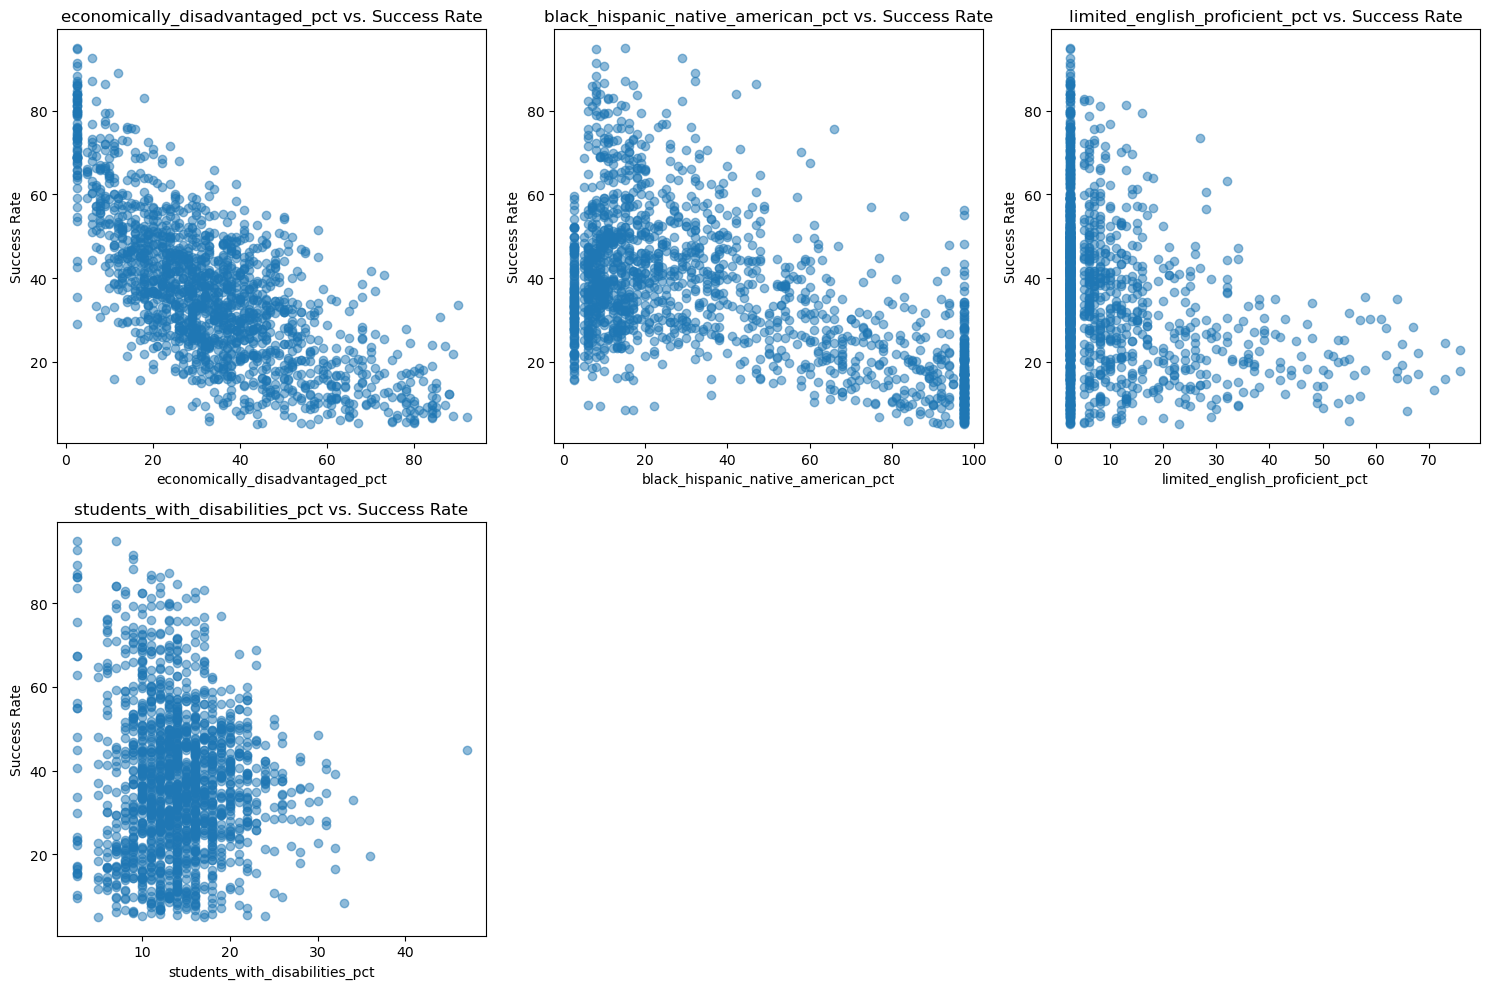

In [39]:
import matplotlib.pyplot as plt

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Create subplots for each comparison
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 3, i)
    plt.scatter(merged_df_cleaned[column], merged_df_cleaned['overall_success_rate_all_students'], alpha=0.5)
    plt.title(f'{column} vs. Success Rate')
    plt.xlabel(column)
    plt.ylabel('Success Rate')

plt.tight_layout()
plt.show()


In [40]:
from scipy.stats import pearsonr

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'homeless_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Convert columns to numeric data type and handle non-numeric values
for column in columns_to_compare:
    merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')

# Remove rows with NaN values in both columns
merged_df_cleaned = merged_df_cleaned.dropna(subset=columns_to_compare + ['overall_success_rate_all_students'])

# Calculate Pearson correlation for each column
correlation_values = {}

for column in columns_to_compare:
    correlation_coefficient, _ = pearsonr(merged_df_cleaned[column], merged_df_cleaned['overall_success_rate_all_students'])
    correlation_values[column] = correlation_coefficient

# Print correlation coefficients
for column, correlation_coefficient in correlation_values.items():
    print(f'Correlation between {column} and overall_success_rate_all_students: {correlation_coefficient:.4f}')


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/997720245.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')


Correlation between economically_disadvantaged_pct and overall_success_rate_all_students: -0.7161
Correlation between black_hispanic_native_american_pct and overall_success_rate_all_students: -0.5618
Correlation between homeless_pct and overall_success_rate_all_students: -0.0954
Correlation between limited_english_proficient_pct and overall_success_rate_all_students: -0.2857
Correlation between students_with_disabilities_pct and overall_success_rate_all_students: -0.0677


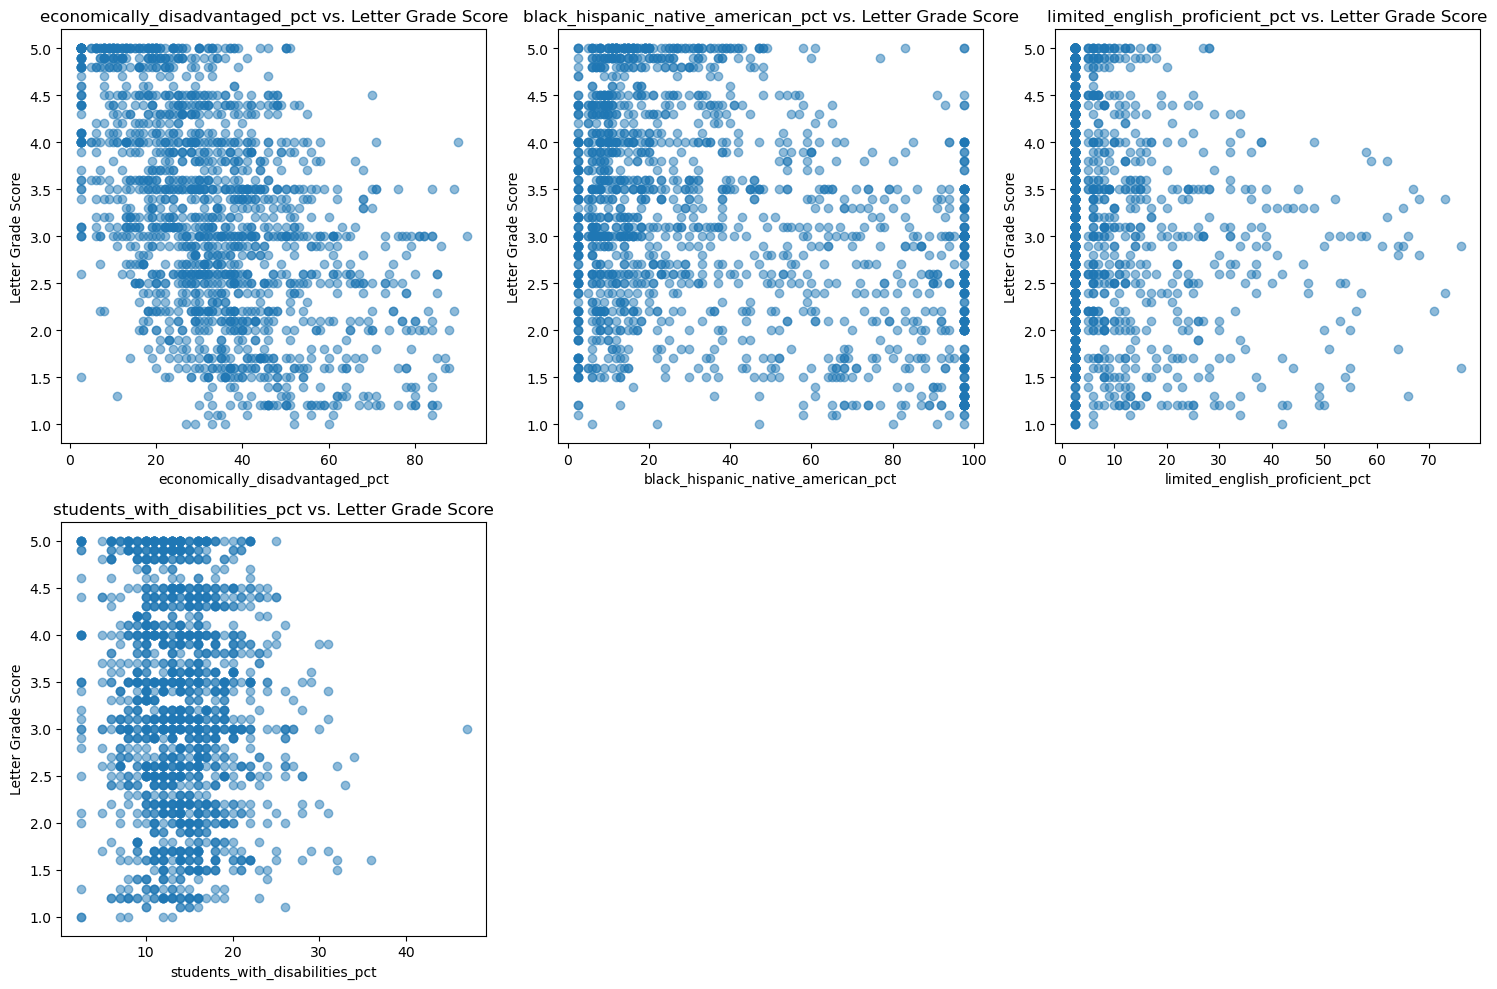

In [41]:
import matplotlib.pyplot as plt

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Create subplots for each comparison
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 3, i)
    plt.scatter(merged_df_cleaned[column], merged_df_cleaned['lg_score'], alpha=0.5)
    plt.title(f'{column} vs. Letter Grade Score')
    plt.xlabel(column)
    plt.ylabel('Letter Grade Score')

plt.tight_layout()
plt.show()


In [42]:
from scipy.stats import pearsonr

# List of columns to compare
columns_to_compare = [
    'economically_disadvantaged_pct',
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Convert columns to numeric data type and handle non-numeric values
for column in columns_to_compare:
    merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')

# Remove rows with NaN values in both columns
merged_df_cleaned = merged_df_cleaned.dropna(subset=columns_to_compare + ['lg_score'])

# Calculate Pearson correlation for each column
correlation_values = {}

for column in columns_to_compare:
    correlation_coefficient, _ = pearsonr(merged_df_cleaned[column], merged_df_cleaned['lg_score'])
    correlation_values[column] = correlation_coefficient

# Print correlation coefficients
for column, correlation_coefficient in correlation_values.items():
    print(f'Correlation between {column} and Letter Grade Score: {correlation_coefficient:.4f}')


Correlation between economically_disadvantaged_pct and Letter Grade Score: -0.5012
Correlation between black_hispanic_native_american_pct and Letter Grade Score: -0.3694
Correlation between limited_english_proficient_pct and Letter Grade Score: -0.1804
Correlation between students_with_disabilities_pct and Letter Grade Score: -0.0891


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_68856/4289072739.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned[column] = pd.to_numeric(merged_df_cleaned[column], errors='coerce')


In [43]:
# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_economically_disadvantaged_by_grade = merged_df_cleaned.groupby('lg_grade')['economically_disadvantaged_pct'].mean()

mean_economically_disadvantaged_by_grade


lg_grade
A    18.344948
B    28.924658
C    36.492157
D    41.968935
F    54.525000
Name: economically_disadvantaged_pct, dtype: float64

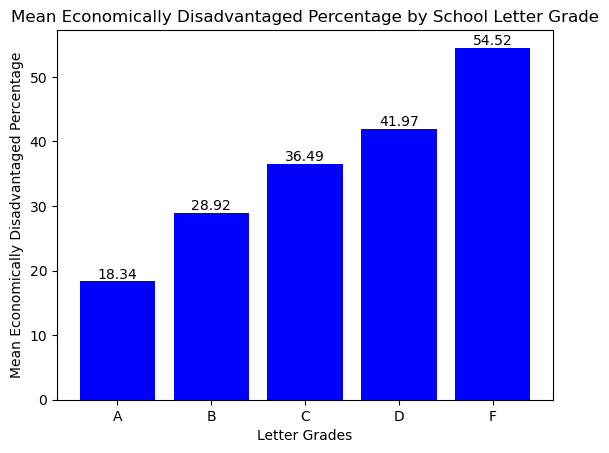

In [44]:
import matplotlib.pyplot as plt

# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_economically_disadvantaged_by_grade = merged_df_cleaned.groupby('lg_grade')['economically_disadvantaged_pct'].mean()

# Sorting the index if you want the grades in a specific order
mean_economically_disadvantaged_by_grade = mean_economically_disadvantaged_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(mean_economically_disadvantaged_by_grade.index, mean_economically_disadvantaged_by_grade.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Mean Economically Disadvantaged Percentage')
plt.title('Mean Economically Disadvantaged Percentage by School Letter Grade')
plt.show()


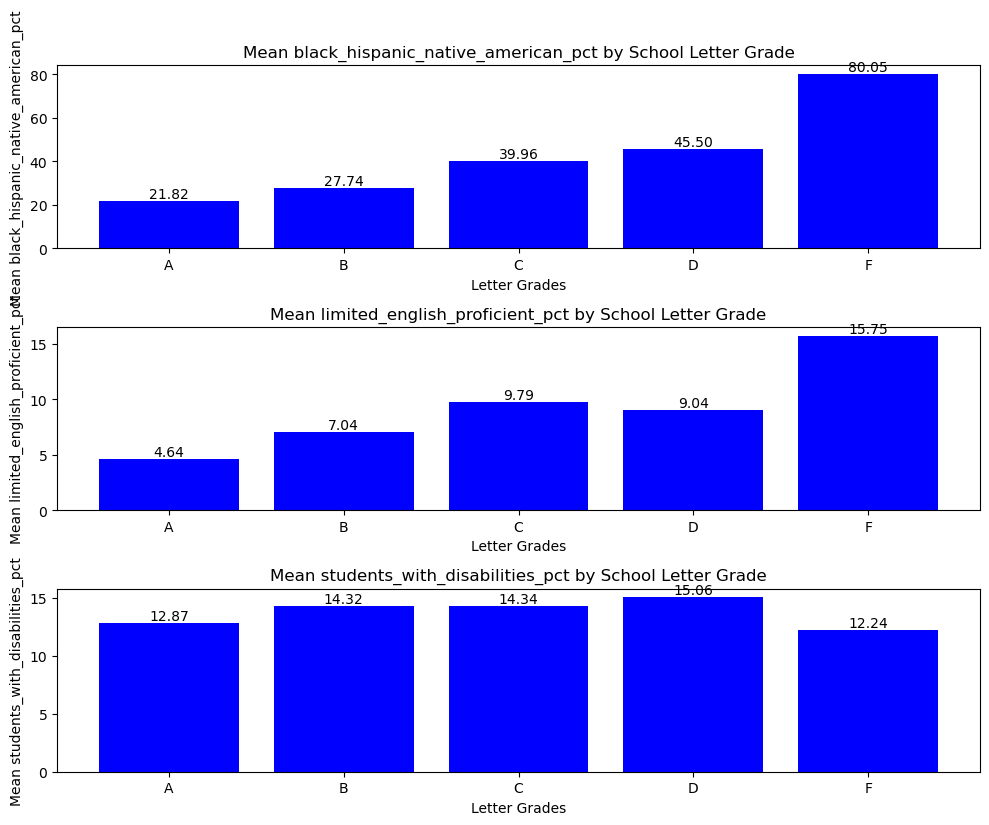

In [45]:
import matplotlib.pyplot as plt

# List of columns to compare
columns_to_compare = [
    'black_hispanic_native_american_pct',
    'limited_english_proficient_pct',
    'students_with_disabilities_pct'
]

# Create subplots for each column
fig, axs = plt.subplots(len(columns_to_compare), figsize=(10, 8))

# Loop through columns and create bar charts
for i, column in enumerate(columns_to_compare):
    # Grouping the data by 'lg_grade' and calculating the mean for the current column
    mean_by_grade = merged_df_cleaned.groupby('lg_grade')[column].mean()

    # Sorting the index if you want the grades in a specific order
    mean_by_grade = mean_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

    # Creating the bar chart for the current column
    bars = axs[i].bar(mean_by_grade.index, mean_by_grade.values, color='blue')

    # Adding data labels to each bar
    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

    axs[i].set_xlabel('Letter Grades')
    axs[i].set_ylabel(f'Mean {column}')
    axs[i].set_title(f'Mean {column} by School Letter Grade')

plt.tight_layout()
plt.show()



In [46]:
# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_bhn_by_grade = merged_df_cleaned.groupby('lg_grade')['black_hispanic_native_american_pct'].mean()

mean_bhn_by_grade


lg_grade
A    21.822300
B    27.740868
C    39.955882
D    45.497041
F    80.050000
Name: black_hispanic_native_american_pct, dtype: float64

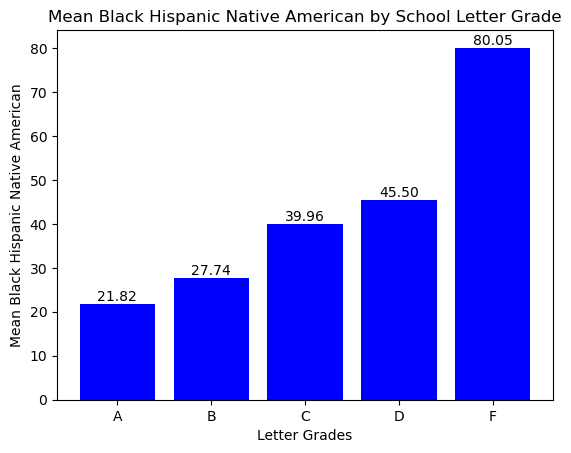

In [47]:
# Sorting the index if you want the grades in a specific order
mean_bhn_by_grade = mean_bhn_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(mean_bhn_by_grade.index, mean_bhn_by_grade.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Mean Black Hispanic Native American')
plt.title('Mean Black Hispanic Native American by School Letter Grade')
plt.show()

In [48]:
# Grouping the data by 'lg_grade' and calculating the mean economically disadvantaged percentage
mean_swd_by_grade = merged_df_cleaned.groupby('lg_grade')['students_with_disabilities_pct'].mean()

mean_swd_by_grade

lg_grade
A    12.874564
B    14.320776
C    14.337255
D    15.056213
F    12.243750
Name: students_with_disabilities_pct, dtype: float64

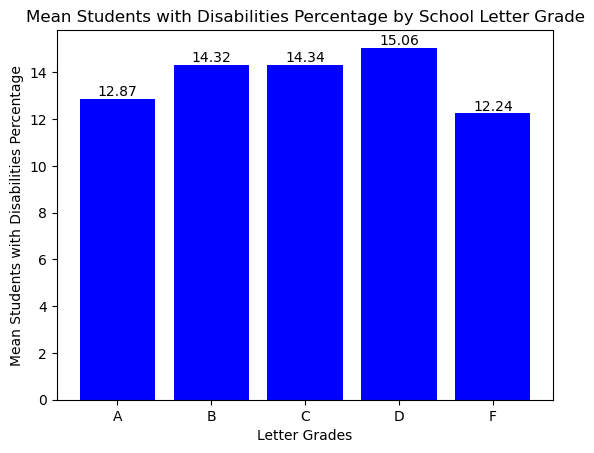

In [49]:
# Sorting the index if you want the grades in a specific order
mean_swd_by_grade = mean_swd_by_grade.reindex(['A', 'B', 'C', 'D', 'F'])

# Creating the bar chart
bars = plt.bar(mean_swd_by_grade.index, mean_swd_by_grade.values, color='blue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.xlabel('Letter Grades')
plt.ylabel('Mean Students with Disabilities Percentage')
plt.title('Mean Students with Disabilities Percentage by School Letter Grade')
plt.show()

In [50]:
merged_df_cleaned.describe()

,ach_score,growth_score,growth25_score,lg_score,overall_success_rate_all_students,african_american_pct,asian_pct,black_hispanic_native_american_pct,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
count,1653.000000,1653.000000,1606.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000
mean,3.267030,3.136116,3.372354,3.235269,36.967877,24.026316,3.209619,36.644283,33.328796,2.859347,8.301573,51.081065,2.505747,2.830611,16.215366,2.501512,14.124622,61.194495
std,1.386172,1.583888,1.185933,1.097657,17.395222,28.600875,2.825335,32.776555,18.534783,2.098086,11.856880,4.066944,0.233662,2.437484,14.628756,0.061490,5.029232,32.660173
min,1.000000,1.000000,1.000000,1.000000,5.100000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
25%,2.000000,1.000000,3.000000,2.400000,24.700000,2.500000,2.500000,10.000000,20.000000,2.500000,2.500000,50.000000,2.500000,2.500000,7.000000,2.500000,11.000000,35.000000
50%,3.000000,3.000000,3.000000,3.200000,35.700000,11.000000,2.500000,22.000000,31.000000,2.500000,2.500000,51.000000,2.500000,2.500000,12.000000,2.500000,14.000000,74.000000
75%,4.700000,5.000000,4.000000,4.100000,47.200000,33.000000,2.500000,61.000000,43.000000,2.500000,8.000000,53.000000,2.500000,2.500000,20.000000,2.500000,17.000000,89.000000
max,5.000000,5.000000,5.000000,5.000000,94.900000,97.500000,46.000000,97.500000,92.000000,37.000000,76.000000,97.500000,12.000000,35.000000,90.000000,5.000000,47.000000,97.500000


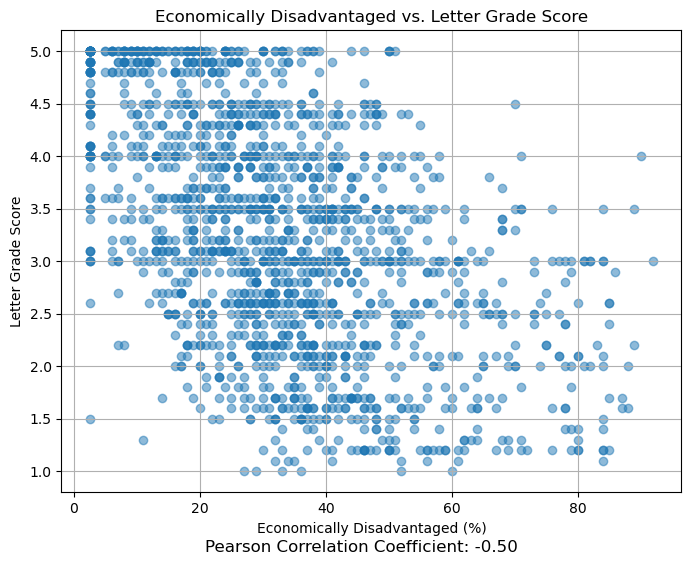

In [51]:
# Scatter plot of economically disadvantaged vs. letter grade score
plt.figure(figsize=(8, 6))
plt.scatter(merged_df_cleaned['economically_disadvantaged_pct'], merged_df_cleaned['lg_score'], alpha=0.5)
plt.title('Economically Disadvantaged vs. Letter Grade Score')
plt.xlabel('Economically Disadvantaged (%)')
plt.ylabel('Letter Grade Score')
plt.grid(True)

# Calculate and print Pearson correlation coefficient
pearson_corr = np.corrcoef(merged_df_cleaned['economically_disadvantaged_pct'], merged_df_cleaned['lg_score'])[0, 1]
plt.figtext(0.5, 0.01, f'Pearson Correlation Coefficient: {pearson_corr:.2f}', ha='center', fontsize=12)

plt.show()

In [52]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(merged_df_cleaned['economically_disadvantaged_pct'], merged_df_cleaned['lg_score'])

corr_coefficient, p_value

(-0.5012373072653616, 7.28752130866062e-106)

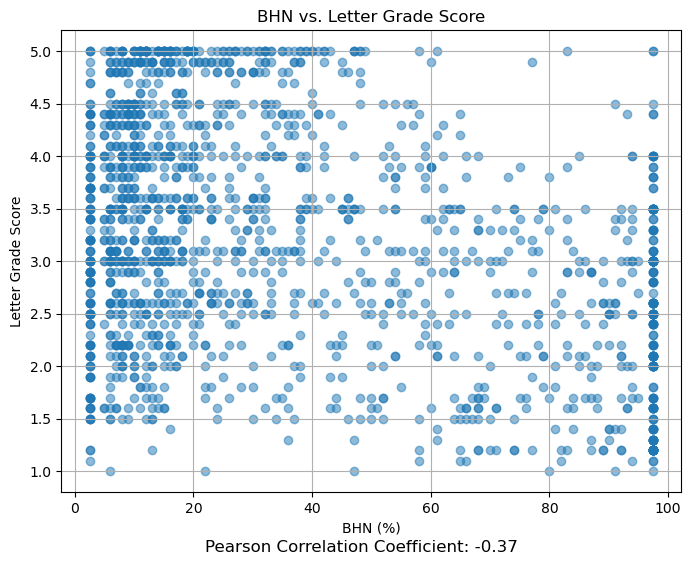

In [53]:
# Scatter plot of economically disadvantaged vs. letter grade score
plt.figure(figsize=(8, 6))
plt.scatter(merged_df_cleaned['black_hispanic_native_american_pct'], merged_df_cleaned['lg_score'], alpha=0.5)
plt.title('BHN vs. Letter Grade Score')
plt.xlabel('BHN (%)')
plt.ylabel('Letter Grade Score')
plt.grid(True)

# Calculate and print Pearson correlation coefficient
pearson_corr = np.corrcoef(merged_df_cleaned['black_hispanic_native_american_pct'], merged_df_cleaned['lg_score'])[0, 1]
plt.figtext(0.5, 0.01, f'Pearson Correlation Coefficient: {pearson_corr:.2f}', ha='center', fontsize=12)

plt.show()

In [54]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(merged_df_cleaned['black_hispanic_native_american_pct'], merged_df_cleaned['lg_score'])

corr_coefficient, p_value

(-0.36943342369153476, 1.3069134953328146e-54)

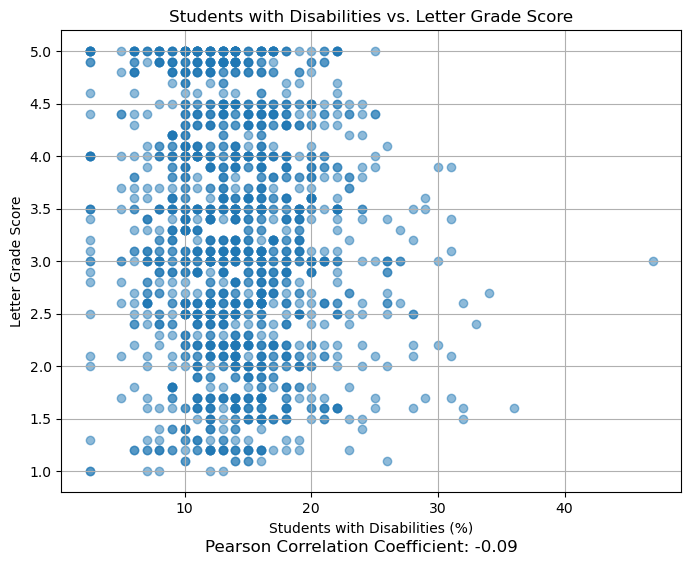

In [55]:
# Scatter plot of economically disadvantaged vs. letter grade score
plt.figure(figsize=(8, 6))
plt.scatter(merged_df_cleaned['students_with_disabilities_pct'], merged_df_cleaned['lg_score'], alpha=0.5)
plt.title('Students with Disabilities vs. Letter Grade Score')
plt.xlabel('Students with Disabilities (%)')
plt.ylabel('Letter Grade Score')
plt.grid(True)

# Calculate and print Pearson correlation coefficient
pearson_corr = np.corrcoef(merged_df_cleaned['students_with_disabilities_pct'], merged_df_cleaned['lg_score'])[0, 1]
plt.figtext(0.5, 0.01, f'Pearson Correlation Coefficient: {pearson_corr:.2f}', ha='center', fontsize=12)

plt.show()

In [56]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(merged_df_cleaned['students_with_disabilities_pct'], merged_df_cleaned['lg_score'])

corr_coefficient, p_value

(-0.08910046240767175, 0.000286686578513169)

In [57]:
merged_df_cleaned.columns

Index(['system_name', 'school_name', 'ach_score', 'growth_score',
       'growth25_score', 'ccr_score', 'lg_score', 'lg_grade',
       'overall_success_rate_all_students', 'overall_success_rate_ed',
       'overall_success_rate_el', 'overall_success_rate_swd',
       'growth_numeracy_score', 'growth_literacy_score',
       'growth_science_score', 'growth_social_studies_score',
       'growth_ela_math_score_bhn', 'growth_ela_math_score_ed',
       'growth_ela_math_score_el', 'growth_ela_math_score_swd', 'ccr_rate',
       'ccr_act_rate', 'ccr_postsec_rate', 'ccr_ic_rate', 'ccr_asvab_rate',
       'ccr_rate_ed', 'ccr_rate_el', 'ccr_rate_swd', 'primary_key', 'total',
       'african_american_pct', 'asian_pct',
       'black_hispanic_native_american_pct', 'economically_disadvantaged_pct',
       'homeless_pct', 'limited_english_proficient_pct', 'male_pct',
       'migrant_pct', 'military_pct', 'multirace_pct', 'native_american_pct',
       'students_with_disabilities_pct', 'white_pct'],
  

In [58]:
merged_df_cleaned = merged_df_cleaned.replace('<5%', 2.5)
merged_df_cleaned = merged_df_cleaned.replace('Insufficient N Count', 2.5)


In [59]:
#Data Cleaning - Remove Not Eligibles
merged_df_cleaned = merged_df_cleaned[merged_df_cleaned['lg_grade'] != 'Not Eligible for a Letter Grade']
merged_df_cleaned.head()

,system_name,school_name,ach_score,growth_score,growth25_score,ccr_score,lg_score,lg_grade,overall_success_rate_all_students,overall_success_rate_ed,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,Anderson County,Anderson County High School,4.0,3,3.0,5,3.7,B,34.2,21.1,...,23.0,2.5,2.5,51.0,2.5,2.5,2.5,2.5,14.0,94.0
1,Anderson County,Andersonville Elementary,5.0,4,3.0,Not a High School,4.4,B,52.2,45.4,...,26.0,2.5,2.5,49.0,2.5,2.5,2.5,2.5,15.0,94.0
2,Anderson County,Briceville Elementary,3.0,2,NaN,Not a High School,2.5,C,30.5,2.5,...,45.0,2.5,2.5,57.0,2.5,2.5,2.5,2.5,26.0,97.5
3,Anderson County,Claxton Elementary,3.0,5,3.0,Not a High School,3.8,B,33.6,28.4,...,39.0,2.5,5.0,53.0,2.5,2.5,11.0,2.5,20.0,83.0
4,Anderson County,Clinton Middle School,3.0,1,3.0,Not a High School,2.2,D,30.1,20.1,...,36.0,2.5,2.5,49.0,2.5,2.5,8.0,2.5,12.0,90.0


In [60]:
# List of columns to be removed
columns_to_remove = ['system_name', 'school_name', 'ach_score', 'growth_score',
                     'growth25_score', 'ccr_score', 'lg_score', 'lg_grade', 'ccr_rate',
                     'ccr_act_rate', 'ccr_postsec_rate', 'ccr_ic_rate', 'ccr_asvab_rate',
                     'ccr_rate_ed', 'ccr_rate_el', 'ccr_rate_swd', 'primary_key', 'total']
# Define the features and the target variable
X = merged_df_cleaned.drop(columns_to_remove, axis=1)  # Remove the brackets around columns_to_remove
y = merged_df_cleaned['lg_grade']  # Target variable
X.head()

,overall_success_rate_all_students,overall_success_rate_ed,overall_success_rate_el,overall_success_rate_swd,growth_numeracy_score,growth_literacy_score,growth_science_score,growth_social_studies_score,growth_ela_math_score_bhn,growth_ela_math_score_ed,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,34.2,21.1,2.5,2.5,5,1,5,2.5,3,1,...,23.0,2.5,2.5,51.0,2.5,2.5,2.5,2.5,14.0,94.0
1,52.2,45.4,2.5,2.5,5,3,4,2.5,2.5,3,...,26.0,2.5,2.5,49.0,2.5,2.5,2.5,2.5,15.0,94.0
2,30.5,2.5,2.5,2.5,2,3,2,2.5,2.5,3,...,45.0,2.5,2.5,57.0,2.5,2.5,2.5,2.5,26.0,97.5
3,33.6,28.4,2.5,13.9,3,4,5,2.5,3,3,...,39.0,2.5,5.0,53.0,2.5,2.5,11.0,2.5,20.0,83.0
4,30.1,20.1,2.5,9.5,1,2,1,1,3,1,...,36.0,2.5,2.5,49.0,2.5,2.5,8.0,2.5,12.0,90.0


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Coefficients
coefficients = logreg.coef_
# Intercepts
intercepts = logreg.intercept_

# If you need to print or use the coefficients and intercepts, you can uncomment the following lines:
print("Coefficients of the model:")
print(coefficients)
print("Intercepts of the model:")
print(intercepts)

# Note: This code assumes all features in 'df' are numerical except for 'lg_grade'.
# Run this in your local Python environment where 'df' is defined.


              precision    recall  f1-score   support

           A       0.80      0.81      0.80        84
           B       0.72      0.66      0.69       140
           C       0.72      0.80      0.76       150
           D       0.79      0.81      0.80        96
           F       0.89      0.62      0.73        26

    accuracy                           0.75       496
   macro avg       0.78      0.74      0.76       496
weighted avg       0.76      0.75      0.75       496

Coefficients of the model:
[[ 4.33719819e+00  1.03417335e+00  3.40876245e-01 -2.60776306e-01
   2.27967558e+00  1.68521381e+00  1.59869165e+00  1.61738753e+00
   8.02257306e-01  7.03692661e-01 -7.55810784e-02  4.22837431e-01
  -2.03526881e-01 -1.59634676e-01 -4.00668772e-01 -1.33452065e+00
  -4.00090373e-01 -1.15115143e+00  6.27481315e-03 -7.50406351e-04
  -3.31360985e-01  9.16434530e-02  8.97742005e-02 -2.26878266e-02
  -6.73581404e-02]
 [ 2.64018583e+00  8.52254891e-01  3.88705659e-02 -2.75751306e-01
   

In [62]:
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg_cv = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg_cv, X_scaled, y, cv=5)

# Display the cross-validation scores
cv_scores



array([0.75830816, 0.74924471, 0.67371601, 0.73333333, 0.68787879])

In [63]:
# Assuming 'logreg_cv' is your trained Logistic Regression model and 'X' has the feature names
feature_names = X.columns
importances = logreg.coef_

for i in range(importances.shape[0]):
    print(f"Class {i}:")
    class_importances = importances[i]
    sorted_indices = np.argsort(np.abs(class_importances))[::-1]
    for idx in sorted_indices:
        print(f"{feature_names[idx]}: {class_importances[idx]}")
    print("\n")


Class 0:
overall_success_rate_all_students: 4.337198187954319
growth_numeracy_score: 2.2796755844815197
growth_literacy_score: 1.685213811073859
growth_social_studies_score: 1.6173875332744483
growth_science_score: 1.5986916515324763
economically_disadvantaged_pct: -1.3345206477116285
limited_english_proficient_pct: -1.1511514311464113
overall_success_rate_ed: 1.0341733483583349
growth_ela_math_score_bhn: 0.8022573064964893
growth_ela_math_score_ed: 0.7036926608187116
growth_ela_math_score_swd: 0.42283743131419366
black_hispanic_native_american_pct: -0.40066877214648894
homeless_pct: -0.4000903731301108
overall_success_rate_el: 0.34087624502095853
military_pct: -0.33136098524287755
overall_success_rate_swd: -0.2607763057899938
african_american_pct: -0.20352688080879153
asian_pct: -0.15963467577880144
multirace_pct: 0.09164345297812754
native_american_pct: 0.08977420050427559
growth_ela_math_score_el: -0.07558107837346213
white_pct: -0.06735814037053171
students_with_disabilities_pct: -

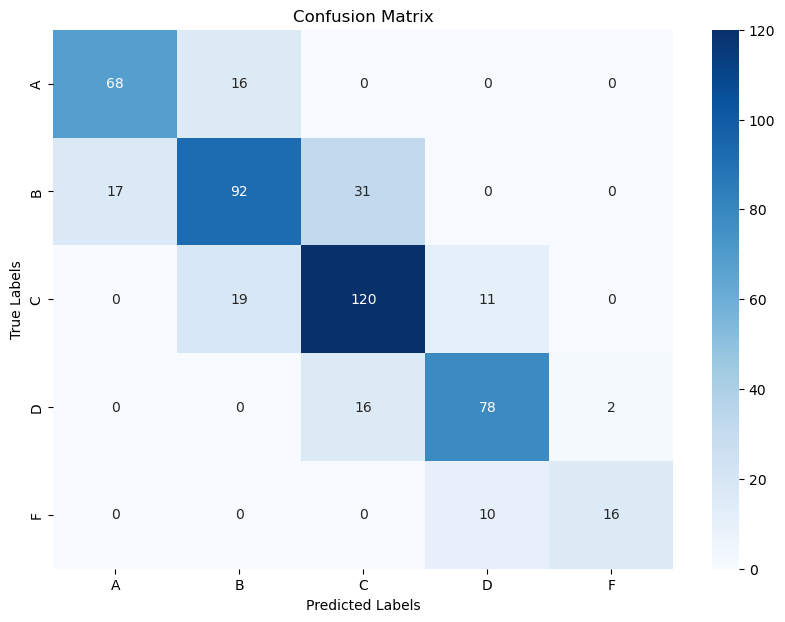

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have y_test and y_pred from the previous model predictions
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



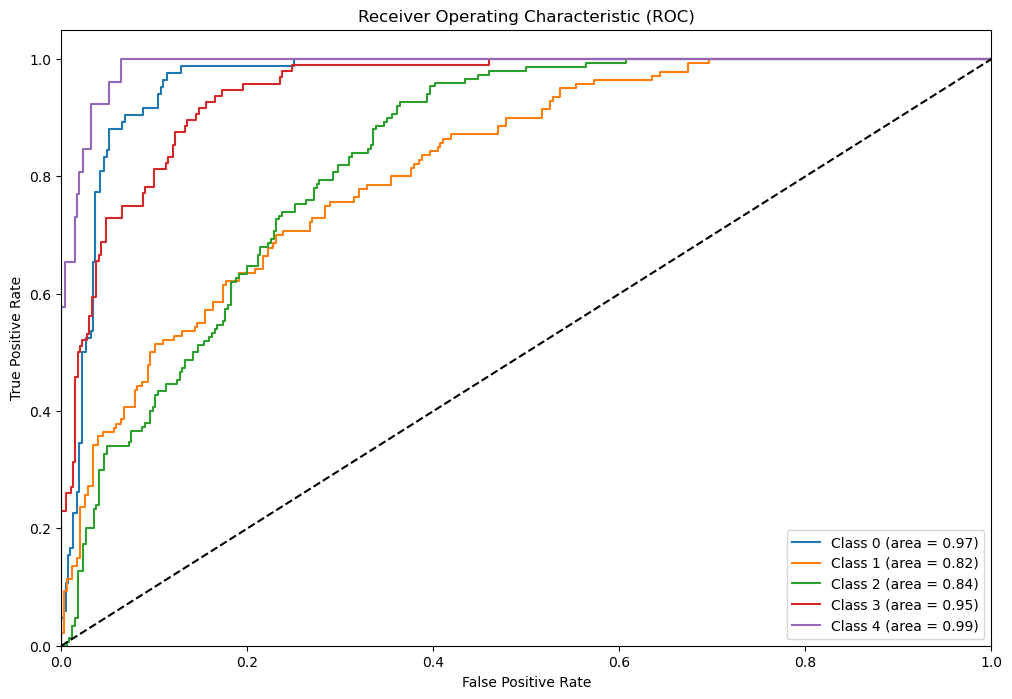

{0: 0.9650369856680536,
 1: 0.8179173354735153,
 2: 0.835626204238921,
 3: 0.9480468750000001,
 4: 0.9893617021276596}

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the y labels to use with ROC AUC
y_binarized = label_binarize(y, classes=sorted(set(y)))
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))

# Initialize the OneVsRestClassifier with a LogisticRegression estimator
logreg_roc = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))

# Fit the model
logreg_roc.fit(X_train, y_train)

# Predict probabilities for each class
y_pred_prob = logreg_roc.predict_proba(X_test)

# Calculate ROC AUC for each class
roc_auc = {}
for i in range(y_binarized.shape[1]):
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(12, 8))
for i in range(y_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Return the dictionary of ROC AUC scores
roc_auc


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability for ROC AUC

# Dictionary to hold models
models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Support Vector Machine': svm
}

# Dictionary to hold results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Predict probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
    else:  # Use decision function for SVM
        y_pred_prob = model.decision_function(X_test)
        
        # Binarize y_test for ROC AUC
        y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
        
        # Compute ROC AUC for each class in one-vs-rest fashion
        roc_auc = {}
        for i in range(y_binarized.shape[1]):
            roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc
    }

results


{'Decision Tree': {'Accuracy': 0.6653225806451613,
  'ROC AUC': {0: 0.9650369856680536,
   1: 0.8179173354735153,
   2: 0.835626204238921,
   3: 0.9480468750000001,
   4: 0.9893617021276596}},
 'Random Forest': {'Accuracy': 0.7661290322580645,
  'ROC AUC': {0: 0.9650369856680536,
   1: 0.8179173354735153,
   2: 0.835626204238921,
   3: 0.9480468750000001,
   4: 0.9893617021276596}},
 'Gradient Boosting': {'Accuracy': 0.7741935483870968,
  'ROC AUC': {0: 0.9650369856680536,
   1: 0.8179173354735153,
   2: 0.835626204238921,
   3: 0.9480468750000001,
   4: 0.9893617021276596}},
 'Support Vector Machine': {'Accuracy': 0.7439516129032258,
  'ROC AUC': {0: 0.9650369856680536,
   1: 0.8179173354735153,
   2: 0.835626204238921,
   3: 0.9480468750000001,
   4: 0.9893617021276596}}}

In [67]:
from sklearn.metrics import precision_recall_fscore_support

# Dictionary to hold precision, recall, and F1 scores for each model
precision_recall_f1_scores = {}

# Calculate precision, recall, and F1 scores for each model
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate precision, recall, and F1 scores
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Store results
    precision_recall_f1_scores[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': fscore
    }

precision_recall_f1_scores



{'Decision Tree': {'Precision': 0.6663017192650891,
  'Recall': 0.6653225806451613,
  'F1 Score': 0.6645366469893885},
 'Random Forest': {'Precision': 0.7729079582366828,
  'Recall': 0.7661290322580645,
  'F1 Score': 0.7634082828626526},
 'Gradient Boosting': {'Precision': 0.7751856424532535,
  'Recall': 0.7741935483870968,
  'F1 Score': 0.7732079849283168},
 'Support Vector Machine': {'Precision': 0.7506916725262013,
  'Recall': 0.7439516129032258,
  'F1 Score': 0.7413178385102213}}

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the predictions from the logistic regression model stored in y_pred_logreg
# Replace 'y_pred_logreg' with the actual predictions variable from your logistic regression model
y_pred_logreg = logreg_roc.predict(X_test)  # Replace with your actual logistic regression predictions

# Calculate precision, recall, and F1 scores for logistic regression
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_score_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# Create a dictionary to store the scores
logreg_scores = {
    'Precision': precision_logreg,
    'Recall': recall_logreg,
    'F1 Score': f1_score_logreg
}

logreg_scores



{'Precision': 0.6966161185249721,
 'Recall': 0.6794354838709677,
 'F1 Score': 0.6716485427179084}

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}

# Create a base model for Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, 
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Best parameters for Gradient Boosting
best_params_gb = grid_search_gb.best_params_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize models with their respective hyperparameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100],
        'max_depth': [20],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3]
    })
}

# Dictionary to hold results and feature importances
results = {}
feature_importances = {}

# Train and evaluate each model with hyperparameter tuning
for name, (model, param_grid) in models.items():
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train_encoded)
    
    # Get the best estimator after hyperparameter tuning
    best_model = grid_search.best_estimator_
    
    # Train the best model
    best_model.fit(X_train, y_train_encoded)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate feature importance if the model has this attribute
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns, 
            'importance': np.round(best_model.feature_importances_, 3)
        })
        feature_importances[name] = feature_importance

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    roc_auc = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test), average='weighted', multi_class='ovr')
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results and feature importances
print("Model Evaluation Results:")
print(results)

print("\nFeature Importances:")
for model_name, importance_df in feature_importances.items():
    print(f"\n{model_name} Feature Importance:")
    print(importance_df)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [79]:
best_params_gb

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Define the best hyperparameters
best_params = {
    'n_estimators': 100, # Replace with the best value you found
    'learning_rate': 0.1, # Replace with the best value you found
    'max_depth': 3 # Replace with the best value you found
}

# Initialize the Gradient Boosting classifier with the best hyperparameters
gradient_boosting = GradientBoostingClassifier(**best_params, random_state=42)

# Train the model on the training data
gradient_boosting.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred = gradient_boosting.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gradient_boosting.predict_proba(X_test), average='weighted', multi_class='ovr')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(gradient_boosting.feature_importances_, 3)})

# Sort feature importance dataframe in descending order of importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Store the evaluation results
evaluation_results = {
    'Accuracy': accuracy,
    'ROC AUC': roc_auc,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Feature Importance': feature_importance
}

print("Final Model Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

ValueError: Mix of label input types (string and number)

In [ ]:
import pandas as pd

# Assuming you have the original dataset or a DataFrame used for training
# You can use the following code to get the feature names
# Replace 'original_data' with the name of your dataset or DataFrame
feature_names = X.columns.tolist()  # This will give you a list of feature names

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # You can adjust this value to see more or fewer features
top_features = importance_df.head(top_n)

# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {top_n} Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Access the top N most important feature names
top_n_feature_names = importance_df.head(top_n)['Feature'].tolist()

# Print the list of top feature names
print(top_n_feature_names)



In [ ]:
importance_df

Feature: 0, Score: 0.00287
Feature: 1, Score: 0.00577
Feature: 2, Score: 0.00267
Feature: 3, Score: 0.00285
Feature: 4, Score: 0.52544
Feature: 5, Score: 0.42540
Feature: 6, Score: 0.02599
Feature: 7, Score: 0.00313
Feature: 8, Score: 0.00310
Feature: 9, Score: 0.00277


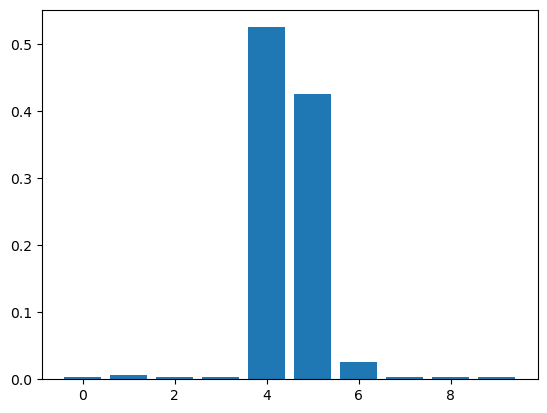

In [81]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: 0.00006
Feature: 1, Score: 0.00690
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.53155
Feature: 5, Score: 0.42948
Feature: 6, Score: 0.03147
Feature: 7, Score: 0.00043
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00001


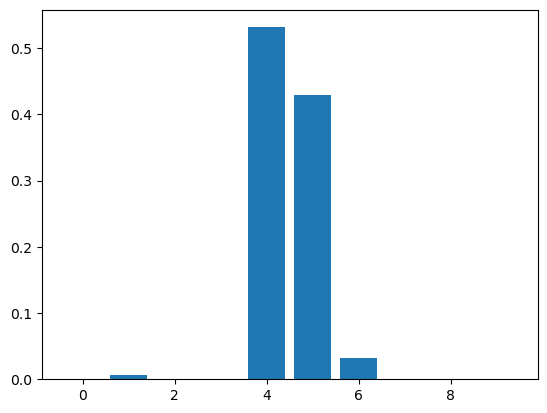

In [84]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = GradientBoostingRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: 0.15174
Feature: 1, Score: -0.56581
Feature: 2, Score: -0.47250
Feature: 3, Score: -0.14069
Feature: 4, Score: 0.06982
Feature: 5, Score: -0.74609
Feature: 6, Score: 0.12295
Feature: 7, Score: 0.04651
Feature: 8, Score: -0.24610
Feature: 9, Score: -0.22746


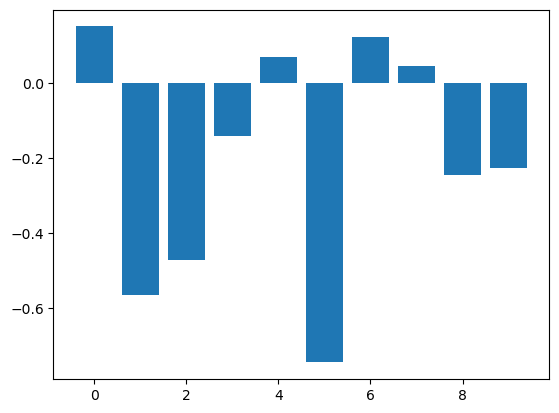

In [87]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Define a classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Define the logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Get the coefficients (used as importance)
importance = model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: 0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


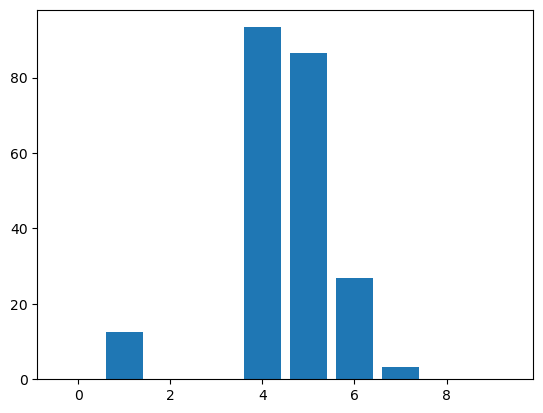

In [88]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X and y are already defined and suitable for a regression task

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients
coefficients = linreg.coef_
# Intercept
intercept = linreg.intercept_

# Printing coefficients and intercept
print("Coefficients of the model:")
print(coefficients)
print("Intercept of the model:")
print(intercept)


Mean Squared Error: 5.710441622239368e-26
Coefficients of the model:
[ 3.69929217e-14  1.27112028e+01  3.55271368e-15  2.30926389e-14
  9.47387081e+01  8.57087619e+01  2.68130114e+01  3.18291125e+00
  5.82867088e-14 -2.84217094e-14]
Intercept of the model:
2.1432435433488815
